In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv("Customer.csv")
print("Shape:", df.shape)
print("\nInfo:", df.info())
print("\nMissing values:", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (750, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     750 non-null    int64
 1   Age             750 non-null    int64
 2   Annual Income   750 non-null    int64
 3   Spending Score  750 non-null    int64
dtypes: int64(4)
memory usage: 23.6 KB

Info: None

Missing values: Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Duplicates: 0


In [15]:
print("\nSummary Stats:\n", df.describe())



Summary Stats:
        Customer ID         Age  Annual Income  Spending Score
count    750.00000  750.000000     750.000000      750.000000
mean   10375.50000   44.678667   83971.844000       49.276000
std      216.65064   15.232491   39449.034933       29.061462
min    10001.00000   18.000000   15126.000000        1.000000
25%    10188.25000   32.000000   51232.250000       24.000000
50%    10375.50000   45.000000   83100.500000       47.000000
75%    10562.75000   57.000000  118587.750000       75.000000
max    10750.00000   70.000000  149869.000000      100.000000


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=['Age (scaled)', 'Annual Income (scaled)', 'Spending Score (scaled)'])

print("\n First 5 rows after Standard Scaling:")
print(scaled_df.head())


⚖️ First 5 rows after Standard Scaling:
   Age (scaled)  Annual Income (scaled)  Spending Score (scaled)
0      0.743732                1.163013                 1.608838
1      1.597740               -0.826347                 1.677703
2      0.086802                1.540308                 0.472556
3     -0.832899               -0.871372                -0.732592
4      1.006504                1.501067                 0.369257


C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

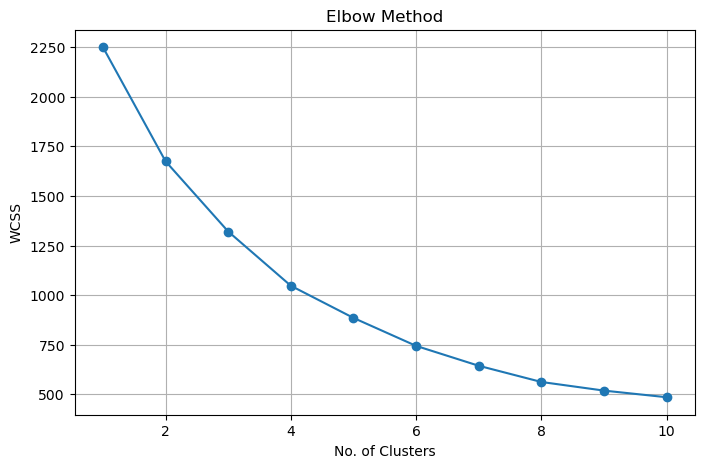

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [20]:
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

os.environ["OMP_NUM_THREADS"] = "3"

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print("Silhouette Scores:")
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {i} --> Silhouette Score: {score:.4f}")


Silhouette Scores:
Clusters: 2 --> Silhouette Score: 0.2466
Clusters: 3 --> Silhouette Score: 0.2494
Clusters: 4 --> Silhouette Score: 0.2712
Clusters: 5 --> Silhouette Score: 0.2725
Clusters: 6 --> Silhouette Score: 0.2907
Clusters: 7 --> Silhouette Score: 0.2893
Clusters: 8 --> Silhouette Score: 0.2899
Clusters: 9 --> Silhouette Score: 0.2953
Clusters: 10 --> Silhouette Score: 0.2937


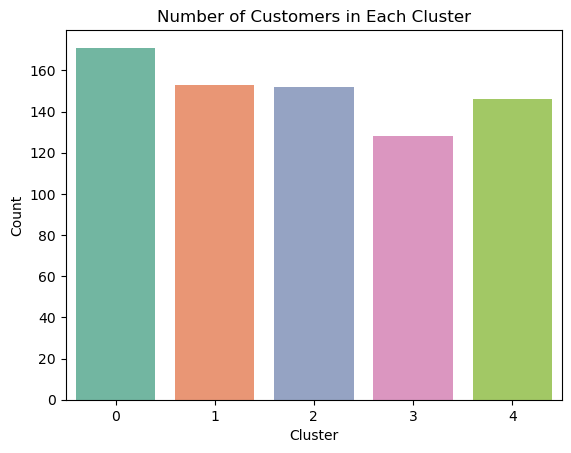

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


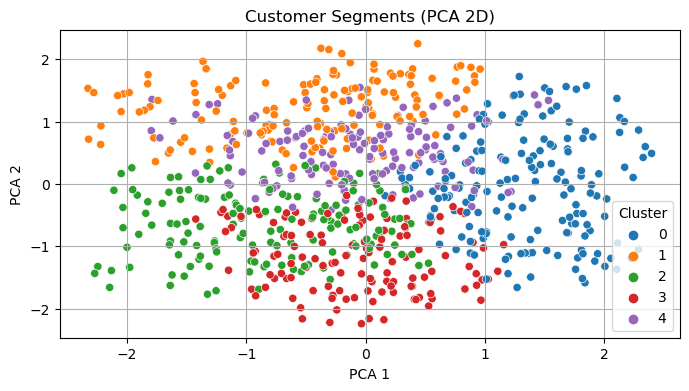

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='tab10')
plt.title("Customer Segments (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

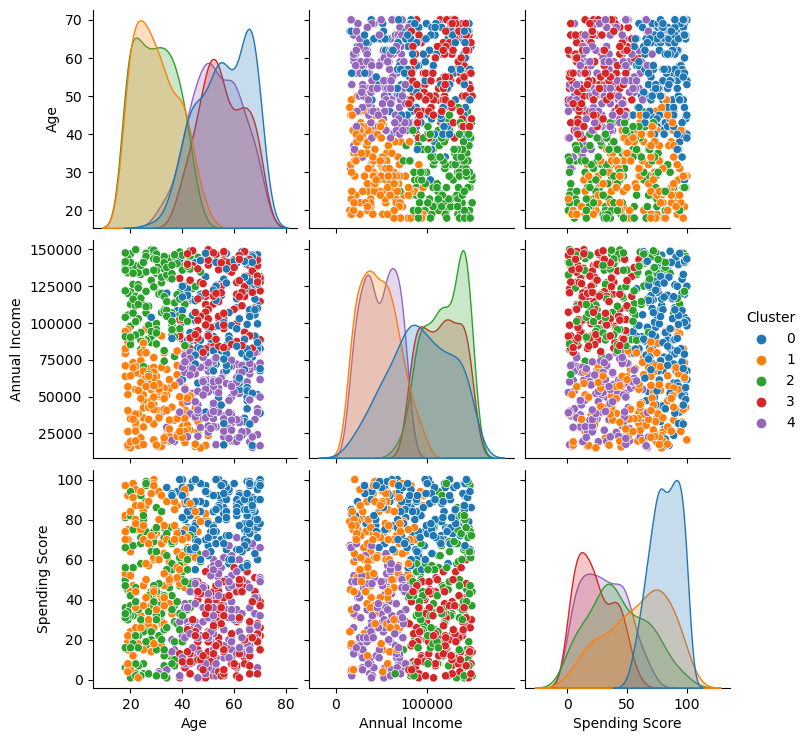

In [27]:
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='tab10')
plt.show()

In [28]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                         columns=['Age', 'Annual Income', 'Spending Score'])

print("Centroids of each cluster:\n", centroids)


Centroids of each cluster:
          Age  Annual Income  Spending Score
0  55.964912   92594.251462       81.795322
1  29.960784   47144.490196       59.013072
2  29.631579  119511.500000       42.585526
3  55.476562  115485.507812       23.640625
4  53.082192   47837.438356       30.424658


In [32]:
# Analyzing clusters
for i in range(optimal_k):
    print(f"\nCluster {i}:\n", df[df['Cluster'] == i].describe())


Cluster 0:
         Customer ID         Age  Annual Income  Spending Score  Cluster
count    171.000000  171.000000     171.000000      171.000000    171.0
mean   10365.713450   55.964912   92594.251462       81.795322      0.0
std      211.069085    9.965762   33915.851101       12.002901      0.0
min    10001.000000   28.000000   16759.000000       51.000000      0.0
25%    10187.500000   49.000000   68652.000000       73.000000      0.0
50%    10382.000000   57.000000   90880.000000       82.000000      0.0
75%    10526.500000   65.000000  119942.000000       92.000000      0.0
max    10750.000000   70.000000  148789.000000      100.000000      0.0

Cluster 1:
         Customer ID         Age  Annual Income  Spending Score  Cluster
count    153.000000  153.000000     153.000000      153.000000    153.0
mean   10374.588235   29.960784   47144.490196       59.013072      1.0
std      221.943435    8.252498   20732.622951       25.704799      0.0
min    10004.000000   18.000000   1512